In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.options.display.max_columns = None

path = './drive/MyDrive/EWD_2022'
row_data = pd.read_csv(f"{path}/immo_data.csv")
data = row_data #duplicate data frame for working at
data.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.0,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.8,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19


In [ ]:
for col in data:
  print(col)
  print(pd.unique(data[col]))

regio1
['Nordrhein_Westfalen' 'Rheinland_Pfalz' 'Sachsen' 'Bremen'
 'Schleswig_Holstein' 'Baden_Württemberg' 'Thüringen' 'Hessen'
 'Niedersachsen' 'Bayern' 'Hamburg' 'Sachsen_Anhalt'
 'Mecklenburg_Vorpommern' 'Berlin' 'Brandenburg' 'Saarland']
serviceCharge
[245.   134.   255.   ... 189.65 250.94 112.13]
heatingType
['central_heating' 'self_contained_central_heating' 'floor_heating'
 'district_heating' 'gas_heating' 'oil_heating' nan 'wood_pellet_heating'
 'electric_heating' 'combined_heat_and_power_plant' 'heat_pump'
 'night_storage_heater' 'stove_heating' 'solar_heating']
telekomTvOffer
['ONE_YEAR_FREE' nan 'NONE' 'ON_DEMAND']
telekomHybridUploadSpeed
[nan 10.]
newlyConst
[False  True]
balcony
[False  True]
picturecount
[  6   8   9  19   5   7  11   4   3  12  17  35  15  13  22  18  14  25
  29  10   2  28  16   0   1  26  20  21  31  32  42  27  23  30  24  53
  40  36  33  48  57  34  39  47  38  73  49  37  66  41  62  44  52  99
  45  78  46  50  43  60  56 121  68  88  64  89 

In [ ]:
data['scoutId'].duplicated().any()
#no duplicates

False

In [ ]:
"""
We will drop this atributes:

telekomTvOffer: Is payed TV included? If so, which offer?
  categorical - 3. labels (with nan)

telekomHybridUploadSpeed: How fast is the hybrid inter upload speed?
  without influence

picturecount: How many pictures were uploaded to the listing?
  without influence (numerical from 1 to >100

pricetrend: Price trend as calculated by Immoscout
  without influence and description how it was calculated

telekomUploadSpeed: How fast is the internet upload speed?
  without influence

scoutId: Immoscout Id

firingTypes: Main energy sources, separated by colon

yearConstructedRange: Binned construction year, 1 to 9
  no inforation about criteria, why and how it was binned

houseNumber: House number
  without influence

street: Street name
  without influence

streetPlain: Street name (plain, different formating)
  without influence

baseRentRange: Binned base rent, 1 to 9
  no inforation about criteria, why and how it was binned

noRoomsRange: Binned number of rooms, 1 to 5
  no inforation about criteria, why and how it was binned

livingSpaceRange: Binned living space, 1 to 7
  no inforation about criteria, why and how it was binned

description: Free text description of the object
  without influence

facilities: Free text description about available facilities
  free text is not good source, other atributes describes it in same way

energyEfficiencyClass: Energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
  without influence

electricityBasePrice: Monthly base price for electricity in € (deprecated since Feb 2020)
  3 values (with nan) - without influence

electricityKwhPrice: Electricity price per kwh (deprecated since Feb 2020)
  without influence

date: Time of scraping
  this model don't explore changing of price in time
"""

"\nWe will drop this atributes:\n\ntelekomTvOffer: Is payed TV included? If so, which offer?\n  categorical - 3. labels (with nan)\n\ntelekomHybridUploadSpeed: How fast is the hybrid inter upload speed?\n  without influence\n\npicturecount: How many pictures were uploaded to the listing?\n  without influence (numerical from 1 to >100\n\npricetrend: Price trend as calculated by Immoscout\n  without influence and description how it was calculated\n\ntelekomUploadSpeed: How fast is the internet upload speed?\n  without influence\n\nscoutId: Immoscout Id\n\nfiringTypes: Main energy sources, separated by colon\n\nyearConstructedRange: Binned construction year, 1 to 9\n  no inforation about criteria, why and how it was binned\n\nhouseNumber: House number\n  without influence\n\nstreet: Street name\n  without influence\n\nstreetPlain: Street name (plain, different formating)\n  without influence\n\nbaseRentRange: Binned base rent, 1 to 9\n  no inforation about criteria, why and how it was bin

In [ ]:
useless_columns = ["telekomTvOffer", 
                   "telekomHybridUploadSpeed", 
                   "picturecount", 
                   "pricetrend", 
                   "telekomUploadSpeed",  
                   "scoutId",
                   "yearConstructedRange",
                   "houseNumber",
                   "street",
                   "streetPlain",
                   "baseRentRange",
                   "noRoomsRange",
                   "firingTypes",
                   "livingSpaceRange",
                   "description",
                   "facilities",
                   "energyEfficiencyClass",
                   "electricityBasePrice",
                   "electricityKwhPrice",
                   "date",
                   'geo_krs',
                   'geo_bln',
                   'regio2',
                   'regio3'
                   ]
#drop 24 useless columns
data = data.drop(columns=useless_columns)

In [ ]:
#totalRent = baseRent + serviceCharge
check_total_rent = data[{'baseRent', 'serviceCharge', 'totalRent'}]
check_total_rent.isna().sum()

baseRent             0
serviceCharge     6909
totalRent        40517
dtype: int64

In [ ]:
RentsRowsByNA = pd.DataFrame(check_total_rent.isnull().sum(axis=1))
RentsRowsByNA.groupby([0])[0].count()/len(check_total_rent)*100

0
0    83.40822
1    15.54324
2     1.04854
Name: 0, dtype: float64

In [ ]:
#if sum of baseRent and serviceCharge devided by totalprice is 1, it means we can completed empt rows
check_total_rent = check_total_rent.dropna() 
check_total_rent['sum_check'] = check_total_rent['baseRent'] + check_total_rent['serviceCharge']
check_total_rent['sum_check'] = check_total_rent['sum_check'] / check_total_rent['totalRent']

check_total_rent['sum_check'].round(2).value_counts(0)* 100 / len(check_total_rent)

#unfortunatly, we will not find coefitiens beetwen this two atributes

<ipython-input-427-0c85ea43a0a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_total_rent['sum_check'] = check_total_rent['baseRent'] + check_total_rent['serviceCharge']
<ipython-input-427-0c85ea43a0a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_total_rent['sum_check'] = check_total_rent['sum_check'] / check_total_rent['totalRent']


1.00      68.775726
0.86       2.087951
0.88       2.022842
0.87       2.007679
0.89       1.955503
            ...    
0.42       0.000446
350.00     0.000446
7.42       0.000446
1.82       0.000446
5.50       0.000446
Name: sum_check, Length: 247, dtype: float64

In [ ]:
check_total_rent['sum_check'].round(1).value_counts()

1.0      164043
0.9       40816
0.8       16414
1.1         749
0.7         736
          ...  
3.2           1
9.0           1
5.1           1
90.0          1
123.3         1
Name: sum_check, Length: 97, dtype: int64

In [ ]:
#now we see that ~15% of rows have na value in serviceCharge or totalRent, ~1% of rows have 2 na values in price variables
#rows with 2 NA values in thos columns will be useless in our model
#at this moment, we will delete rows with any na values in this two columns, but for future it's a good idea, to looking for dependence beetween it and values and other variables 
#(maybe some region have no culture for that or maybe in cities its faster market)
data = data.dropna(subset=['serviceCharge', 'totalRent'])

In [ ]:
#check operation
print(data['serviceCharge'].isnull().sum())
data['totalRent'].isnull().sum()

0


0

In [ ]:
data.shape

(224243, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224243 entries, 0 to 268848
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   regio1           224243 non-null  object 
 1   serviceCharge    224243 non-null  float64
 2   heatingType      189554 non-null  object 
 3   newlyConst       224243 non-null  bool   
 4   balcony          224243 non-null  bool   
 5   totalRent        224243 non-null  float64
 6   yearConstructed  177312 non-null  float64
 7   noParkSpaces     76648 non-null   float64
 8   hasKitchen       224243 non-null  bool   
 9   cellar           224243 non-null  bool   
 10  baseRent         224243 non-null  float64
 11  livingSpace      224243 non-null  float64
 12  condition        169461 non-null  object 
 13  interiorQual     137826 non-null  object 
 14  petsAllowed      131503 non-null  object 
 15  lift             224243 non-null  bool   
 16  typeOfFlat       194163 non-null  obje

In [ ]:
data.shape

(224243, 25)

In [ ]:
percentage_of_null = data.isnull().sum()* 100 / len(data)
percentage_of_null = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percentage_of_null})
percentage_of_null.sort_values('percent_missing', inplace=True, ascending=False)
percentage_of_null

,column_name,percent_missing
lastRefurbish,lastRefurbish,67.929434
heatingCosts,heatingCosts,67.435773
noParkSpaces,noParkSpaces,65.819223
petsAllowed,petsAllowed,41.356921
thermalChar,thermalChar,40.332140
interiorQual,interiorQual,38.537212
numberOfFloors,numberOfFloors,34.207980
condition,condition,24.429748
yearConstructed,yearConstructed,20.928635
floor,floor,16.967308


In [ ]:
#dropping columns containing more than 40% missing values
for column in data:
    if (data[column].isnull().sum()/len(data.index) * 100) > 40: #interoirQuality and Condition are similar (additionaly to newlyCost=0%),
        data.drop(column,axis=1,inplace = True)      

data.shape

(224243, 20)

In [ ]:
#check the quality of rows with na values
countRowsByNA = pd.DataFrame(data.isnull().sum(axis=1))
print(countRowsByNA.groupby([0])[0].count()/len(data)*100)

0
0    31.728973
1    22.139822
2    17.833779
3    14.674260
4     7.844615
5     4.121422
6     1.461361
7     0.195770
Name: 0, dtype: float64


In [ ]:
data.describe()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,geo_plz,noRooms,floor,numberOfFloors
count,224243.000000,2.242430e+05,177312.000000,224243.000000,224243.000000,224243.000000,224243.000000,186195.000000,147534.000000
mean,151.423054,8.921350e+02,1965.609293,642.056936,73.214572,36269.203079,2.621105,2.133575,3.585580
std,326.320957,3.337203e+04,47.851894,505.543726,145.958021,27948.104870,1.734724,3.567219,5.911557
min,0.000000,0.000000e+00,1000.000000,0.000000,0.000000,852.000000,1.000000,-1.000000,0.000000
25%,95.480000,4.690000e+02,1940.000000,333.000000,54.000000,9119.000000,2.000000,1.000000,2.000000
50%,136.000000,6.481300e+02,1972.000000,486.720000,67.000000,37085.000000,3.000000,2.000000,3.000000
75%,190.000000,9.800000e+02,1996.000000,793.515000,86.000000,55543.000000,3.000000,3.000000,4.000000
max,146118.000000,1.575154e+07,2090.000000,30990.000000,66100.000000,99998.000000,560.000000,999.000000,999.000000


In [ ]:
#We delete values that are outliers or have no sanse
df = data
df = df[df.serviceCharge.between(50,300, inclusive=True)] 
df = df[df.yearConstructed.between(1500,2019, inclusive=True)] 
df = df[df.baseRent.between(100,10000, inclusive=True)]
df = df[df.livingSpace.between(20, 500, inclusive=True)]
df = df[df.noRooms.between(0,15, inclusive=True)]
df = df[df.floor.between(-1,50, inclusive=True)] 
df = df[df.totalRent.between(100,15000, inclusive=True)]
df = df[df.numberOfFloors.between(1,50, inclusive=True)]

<ipython-input-388-daffbc436f92>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.serviceCharge.between(50,300, inclusive=True)]
<ipython-input-388-daffbc436f92>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.yearConstructed.between(1500,2019, inclusive=True)]
<ipython-input-388-daffbc436f92>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.baseRent.between(100,10000, inclusive=True)]
<ipython-input-388-daffbc436f92>:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.livingSpace.between(20, 500, inclusive=True)]
<ipython-input-388-daffbc436f92>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df.noRooms.between(0,15, inclusive=Tru

In [ ]:
df.shape

#it's around 150k rows. Our dataset have still 100k but it takes information about low quality of this data. We will check what it has changed it in next step

(100060, 20)

In [ ]:
percentage_of_null = df.isnull().sum()* 100 / len(data)
percentage_of_null = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percentage_of_null})
percentage_of_null.sort_values('percent_missing', inplace=True, ascending=False)
percentage_of_null

,column_name,percent_missing
interiorQual,interiorQual,10.642919
condition,condition,5.057014
typeOfFlat,typeOfFlat,3.694653
heatingType,heatingType,3.350829
regio1,regio1,0.000000
numberOfFloors,numberOfFloors,0.000000
floor,floor,0.000000
noRooms,noRooms,0.000000
geo_plz,geo_plz,0.000000
lift,lift,0.000000


In [ ]:
DataRowsByNA = pd.DataFrame(data.isnull().sum(axis=1))
DataRowsByNA.groupby([0])[0].count()/len(data)*100

0
0    31.728973
1    22.139822
2    17.833779
3    14.674260
4     7.844615
5     4.121422
6     1.461361
7     0.195770
Name: 0, dtype: float64

In [ ]:
dfRowsByNA = pd.DataFrame(df.isnull().sum(axis=1))
dfRowsByNA.groupby([0])[0].count()/len(data)*100

0
0    28.681386
1    10.713824
2     3.759315
3     1.353888
4     0.112824
Name: 0, dtype: float64

In [ ]:
#This step increased the quality of rows in high level - we will get it as empty observations
data = df

In [ ]:
#print columns with counting more than 0% missing values
more_than_0_col = []
for column in data:
    if (data[column].isnull().sum()/len(data.index) * 100) > 0:
        more_than_0_col.append(column)
        print(f"{data[column].isnull().sum()/len(data.index) * 100} - {column}")

7.509494303417949 - heatingType
11.333200079952029 - condition
23.851688986608035 - interiorQual
8.280031980811513 - typeOfFlat


In [ ]:
nan_test1 = data.dropna(subset = more_than_0_col, thresh=3 )
nan_test1.shape
#this solution delete ~25% of rows, we have to find other way

(88341, 20)

In [ ]:
percentage_of_null = nan_test1.isnull().sum()* 100 / len(nan_test1)
percentage_of_null = pd.DataFrame({'column_name': nan_test1.columns,
                                 'percent_missing': percentage_of_null})
percentage_of_null.sort_values('percent_missing', inplace=True, ascending=False)
percentage_of_null
#this solution bringing not good score

,column_name,percent_missing
interiorQual,interiorQual,14.813054
typeOfFlat,typeOfFlat,4.978436
condition,condition,3.704961
heatingType,heatingType,3.699302
regio1,regio1,0.000000
numberOfFloors,numberOfFloors,0.000000
floor,floor,0.000000
noRooms,noRooms,0.000000
geo_plz,geo_plz,0.000000
lift,lift,0.000000


In [ ]:
data.shape

(100060, 20)

In [ ]:
#Let's assumpt, we have 20 columns, in types:
#Boolen - 6 - newlyConst, balcony, hasKitchen, cellar, lift, garden
#Numerical - 5 - yearConstructed, livingSpace, noRooms, floor, numberOfFloors
  #Price - 3 - serviceCharge, totalRent, baseRent
#Geo - 2 - regio1, geo_plz 
#Dict - 4 - heatingType!!, condition!!!, interiorQual!!!, typeOfFlat!!

In [ ]:
#Fill null value on NA place
data['heatingType'].fillna("null",inplace=True)
data['condition'].fillna("null",inplace=True)
data['interiorQual'].fillna("null",inplace=True)
data['typeOfFlat'].fillna("null",inplace=True)

IntreriorQuality & Condition column:

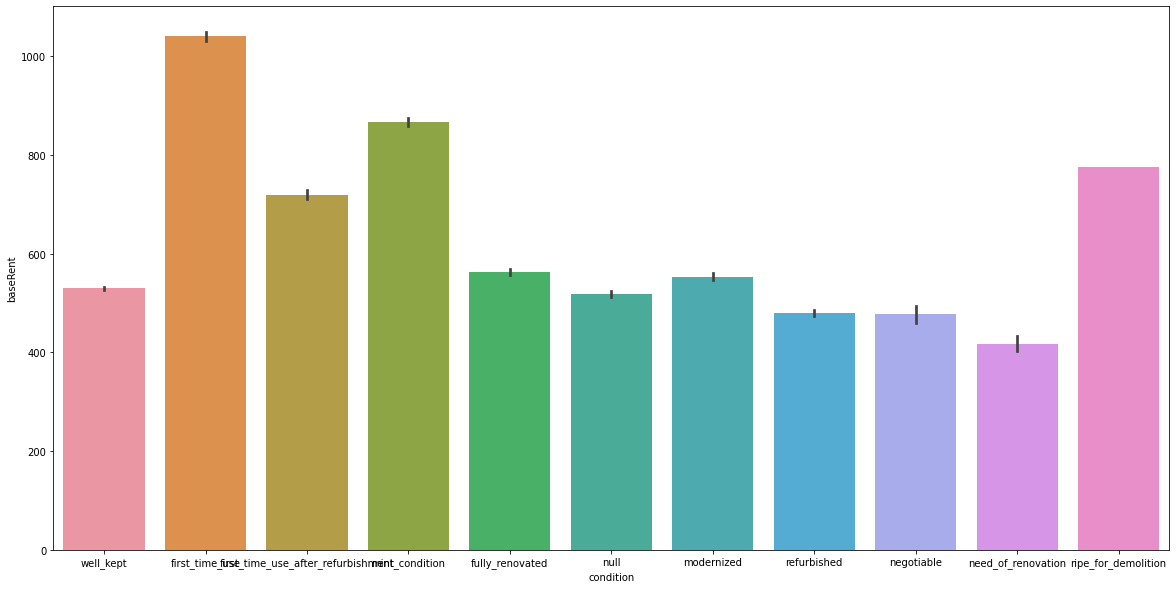

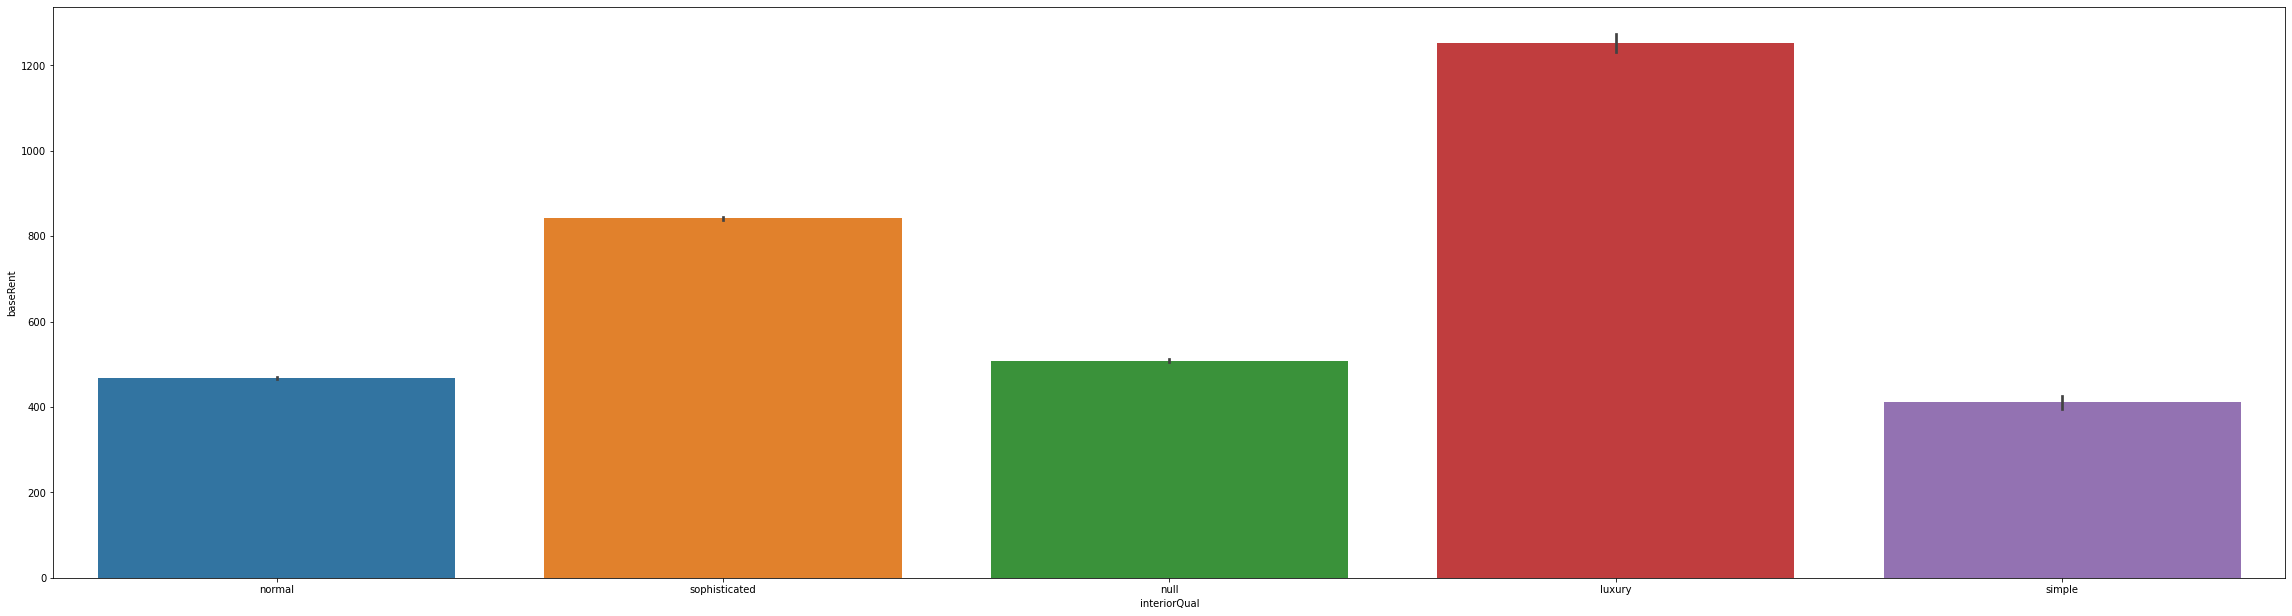

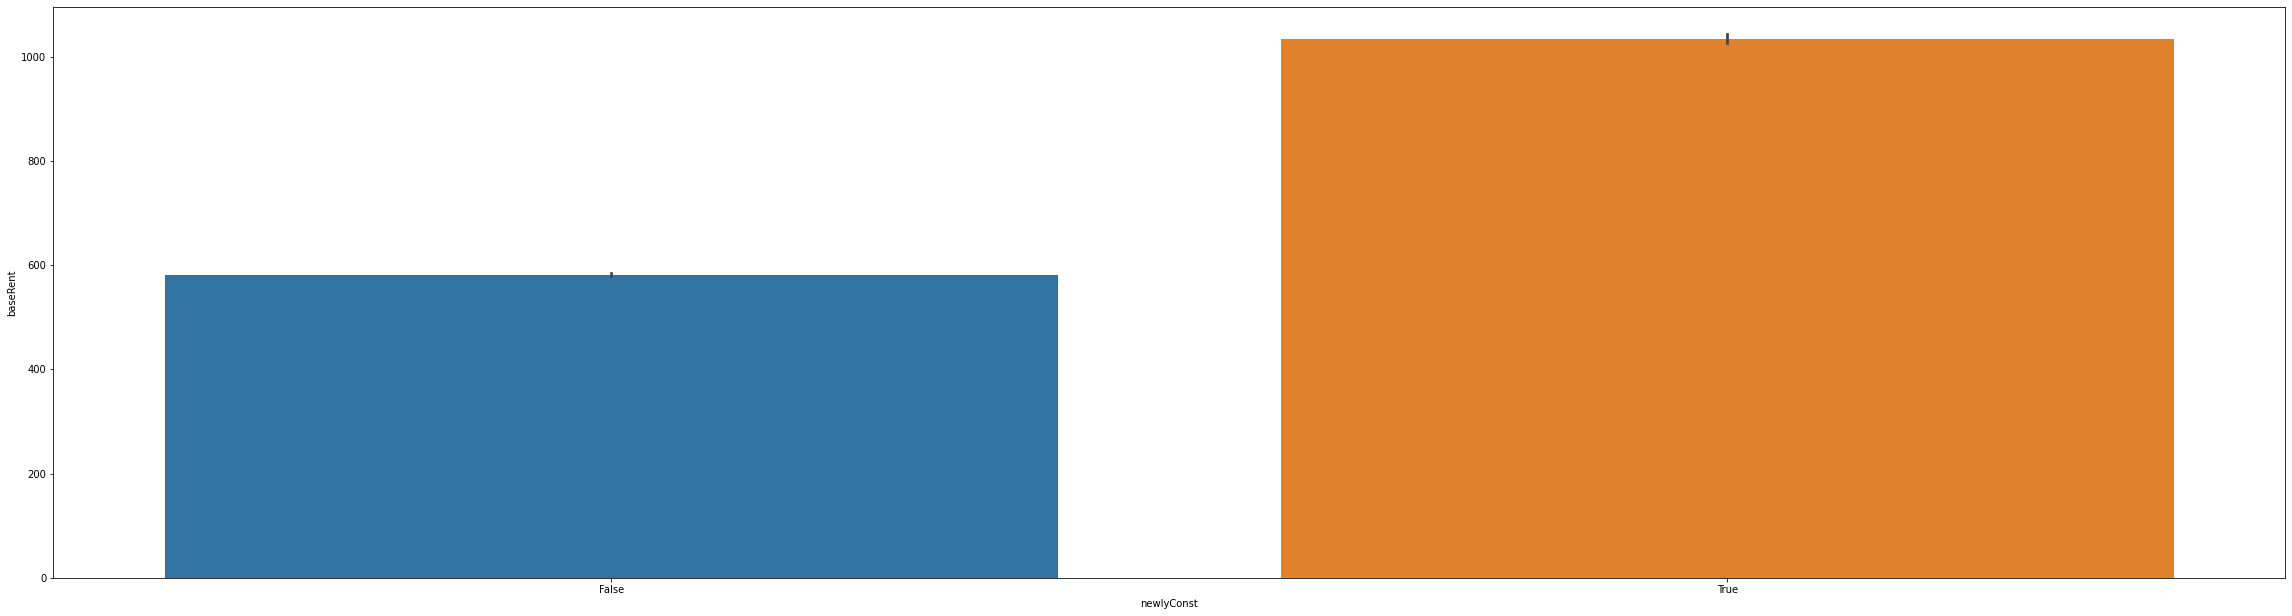

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))

sns.barplot(x=data['condition'], y=data.baseRent)
plt.show()

sns.barplot(x=data['interiorQual'], y=data.baseRent)
plt.show()

sns.barplot(x=data['newlyConst'], y=data.baseRent)
plt.show()



In [ ]:
data['condition'].value_counts()

well_kept                             30258
fully_renovated                       11943
null                                  11340
refurbished                           11130
mint_condition                        10497
first_time_use                         8584
modernized                             7588
first_time_use_after_refurbishment     7188
negotiable                              946
need_of_renovation                      585
ripe_for_demolition                       1
Name: condition, dtype: int64

In [ ]:
data['interiorQual'].value_counts()

normal           40320
sophisticated    31877
null             23866
luxury            3149
simple             848
Name: interiorQual, dtype: int64

In [ ]:
data.groupby('condition')['baseRent'].mean()

condition
first_time_use                        1040.431510
first_time_use_after_refurbishment     719.772905
fully_renovated                        563.770821
mint_condition                         867.095523
modernized                             552.919537
need_of_renovation                     417.793538
negotiable                             477.350423
null                                   517.802433
refurbished                            480.665378
ripe_for_demolition                    775.000000
well_kept                              530.139899
Name: baseRent, dtype: float64

In [ ]:
data.groupby('interiorQual')['baseRent'].mean()

interiorQual
luxury           1252.387498
normal            467.338556
null              508.540142
simple            411.412983
sophisticated     841.428671
Name: baseRent, dtype: float64

In [ ]:
#we will change null values for potential most propaply value, based on mean baseRent and condition in newlyCont (most probably first time used and no na vaues from start)
for index, row in data.iterrows():
    if ((row["newlyConst"] == True) & (row["condition"]=="null")):
        data.loc[index,['condition']] = "first_time_use"
    elif ((row["newlyConst"] == False) & (row["condition"]=="null") & (row["baseRent"]>=700)):
        data.loc[index,['condition']] = "first_time_use_after_refurbishment"
    elif ((row["newlyConst"] == False) & (row["condition"]=="null") & (row["baseRent"]<450)):
        data.loc[index,['condition']] = "need_of_renovation"
    elif (row["condition"]=="null"):
        data.loc[index,['condition']] = "well_kept"

In [ ]:
#the same logic for interior quality, by condition and base rent (we signed some rows by well_kept, but we will it's most popular and max. 11% of rows have labels in previus step)
for index, row in data.iterrows():
    if ((row["condition"] == "first_time_use_after_refurbishment") & (row["interiorQual"]=="null") & (row["baseRent"]>800)):
        data.loc[index,['interiorQual']] = "sophisticated"
    elif (row["interiorQual"]=="null"):
        data.loc[index,['interiorQual']] = "normal"

In [ ]:
data['condition'].unique()

array(['well_kept', 'first_time_use',
       'first_time_use_after_refurbishment', 'mint_condition',
       'fully_renovated', 'need_of_renovation', 'modernized',
       'refurbished', 'negotiable', 'ripe_for_demolition'], dtype=object)

In [ ]:
data['interiorQual'].unique()

array(['normal', 'sophisticated', 'luxury', 'simple'], dtype=object)

HeatingType



In [ ]:
data['heatingType'].unique()

array(['central_heating', 'floor_heating', 'oil_heating', 'gas_heating',
       'district_heating', 'wood_pellet_heating', 'null',
       'electric_heating', 'self_contained_central_heating',
       'combined_heat_and_power_plant', 'night_storage_heater',
       'stove_heating', 'heat_pump', 'solar_heating'], dtype=object)

<BarContainer object of 14 artists>

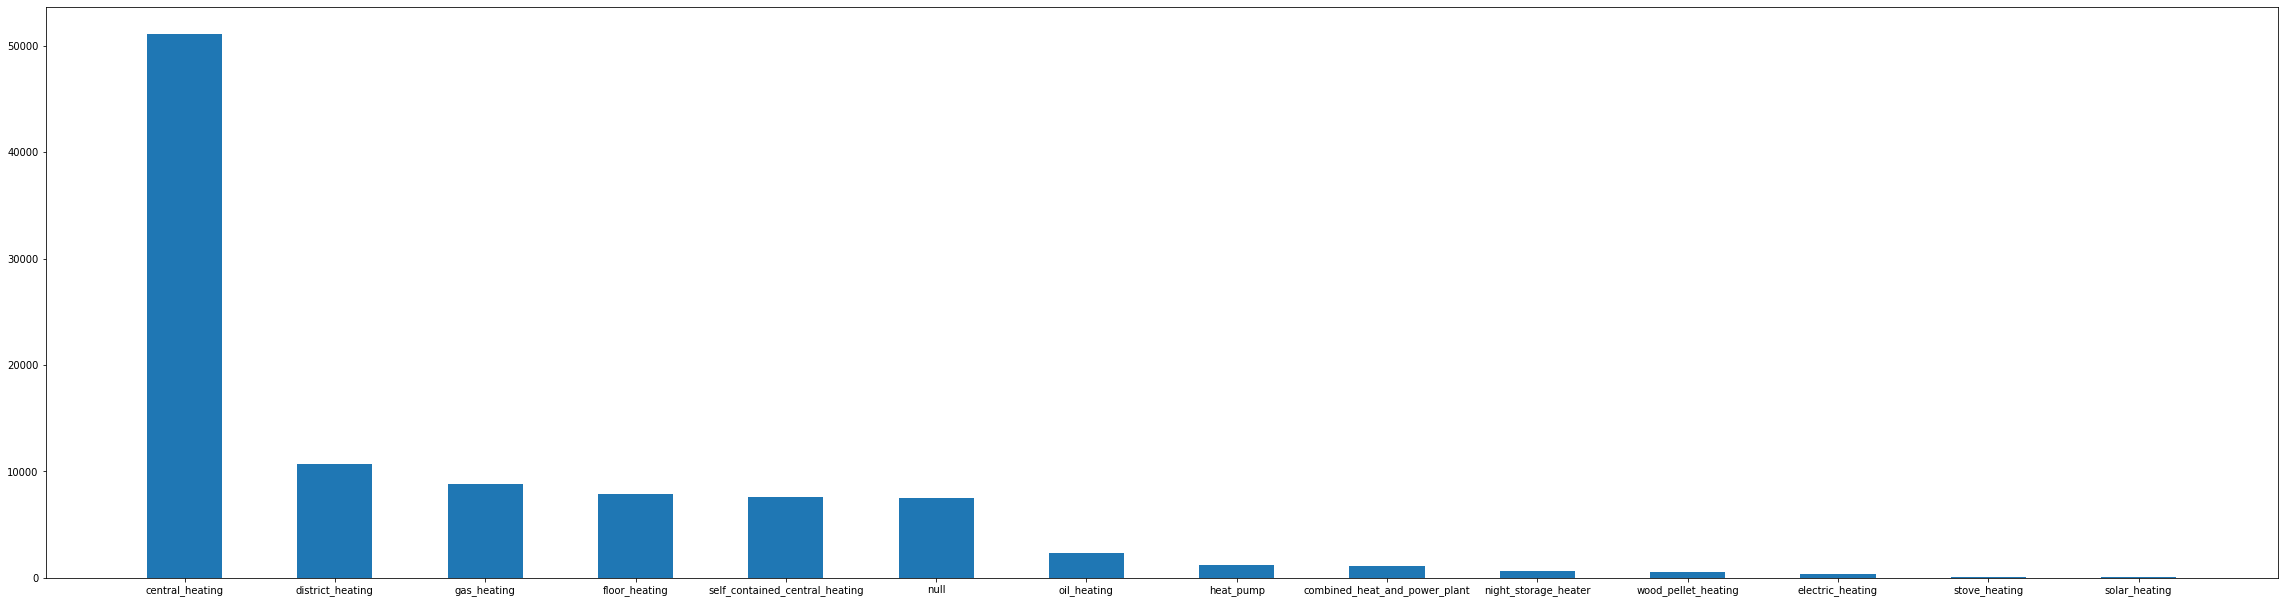

In [ ]:
categories = data['heatingType'].value_counts().index
counts = data['heatingType'].value_counts().values
plt.bar(categories, counts, width=0.5)

In [ ]:
data['heatingType'].value_counts()

central_heating                   51087
district_heating                  10738
gas_heating                        8792
floor_heating                      7890
self_contained_central_heating     7593
null                               7514
oil_heating                        2349
heat_pump                          1244
combined_heat_and_power_plant      1131
night_storage_heater                670
wood_pellet_heating                 516
electric_heating                    331
stove_heating                       109
solar_heating                        96
Name: heatingType, dtype: int64

In [ ]:
#we will flag by binary column more disared locations, but before take labels in atribute
data['BoostHeating'] = (data['heatingType'] == 'central_heating') | (data['heatingType'] == 'floor_heating') | \
(data['heatingType'] == 'heat_pump') | (data['heatingType'] == 'self_contained_central_heating') | (data['heatingType'] == 'solar_heating')

In [ ]:
data.groupby('heatingType')['baseRent'].mean()

heatingType
central_heating                    560.989617
combined_heat_and_power_plant      856.965491
district_heating                   578.631077
electric_heating                   553.828308
floor_heating                     1006.176957
gas_heating                        646.128438
heat_pump                          972.568207
night_storage_heater               459.379821
null                               548.025615
oil_heating                        650.368931
self_contained_central_heating     617.729385
solar_heating                      913.142917
stove_heating                      519.625321
wood_pellet_heating                876.274535
Name: baseRent, dtype: float64

In [ ]:
for index, row in data.iterrows():
    if row["heatingType"] == 'null':
        data.loc[index,['heatingType']] = 'central_heating'

In [ ]:
data['heatingType'].value_counts()

central_heating                   58601
district_heating                  10738
gas_heating                        8792
floor_heating                      7890
self_contained_central_heating     7593
oil_heating                        2349
heat_pump                          1244
combined_heat_and_power_plant      1131
night_storage_heater                670
wood_pellet_heating                 516
electric_heating                    331
stove_heating                       109
solar_heating                        96
Name: heatingType, dtype: int64

In [ ]:
#the same step for type of flat, couse appartment is most popular, but not disared in set
data['typeOfFlat'].value_counts()

apartment              55545
roof_storey            14649
ground_floor            9276
null                    8285
maisonette              3546
other                   3280
raised_ground_floor     2008
terraced_flat           1405
penthouse               1326
half_basement            446
loft                     294
Name: typeOfFlat, dtype: int64

In [ ]:
data.groupby('typeOfFlat')['baseRent'].mean()

typeOfFlat
apartment               601.742231
ground_floor            620.192263
half_basement           517.000650
loft                   1116.208231
maisonette              934.931698
null                    499.549045
other                   612.668979
penthouse              1238.607587
raised_ground_floor     585.399736
roof_storey             600.029046
terraced_flat           916.773609
Name: baseRent, dtype: float64

In [ ]:
for index, row in data.iterrows():
    if row["typeOfFlat"] == 'null':
        data.loc[index,['typeOfFlat']] = 'apartment'

In [ ]:
data['typeOfFlat'].value_counts()

apartment              63830
roof_storey            14649
ground_floor            9276
maisonette              3546
other                   3280
raised_ground_floor     2008
terraced_flat           1405
penthouse               1326
half_basement            446
loft                     294
Name: typeOfFlat, dtype: int64

In [ ]:
data.isnull().any().sum()
#data is without walues

0

<BarContainer object of 16 artists>

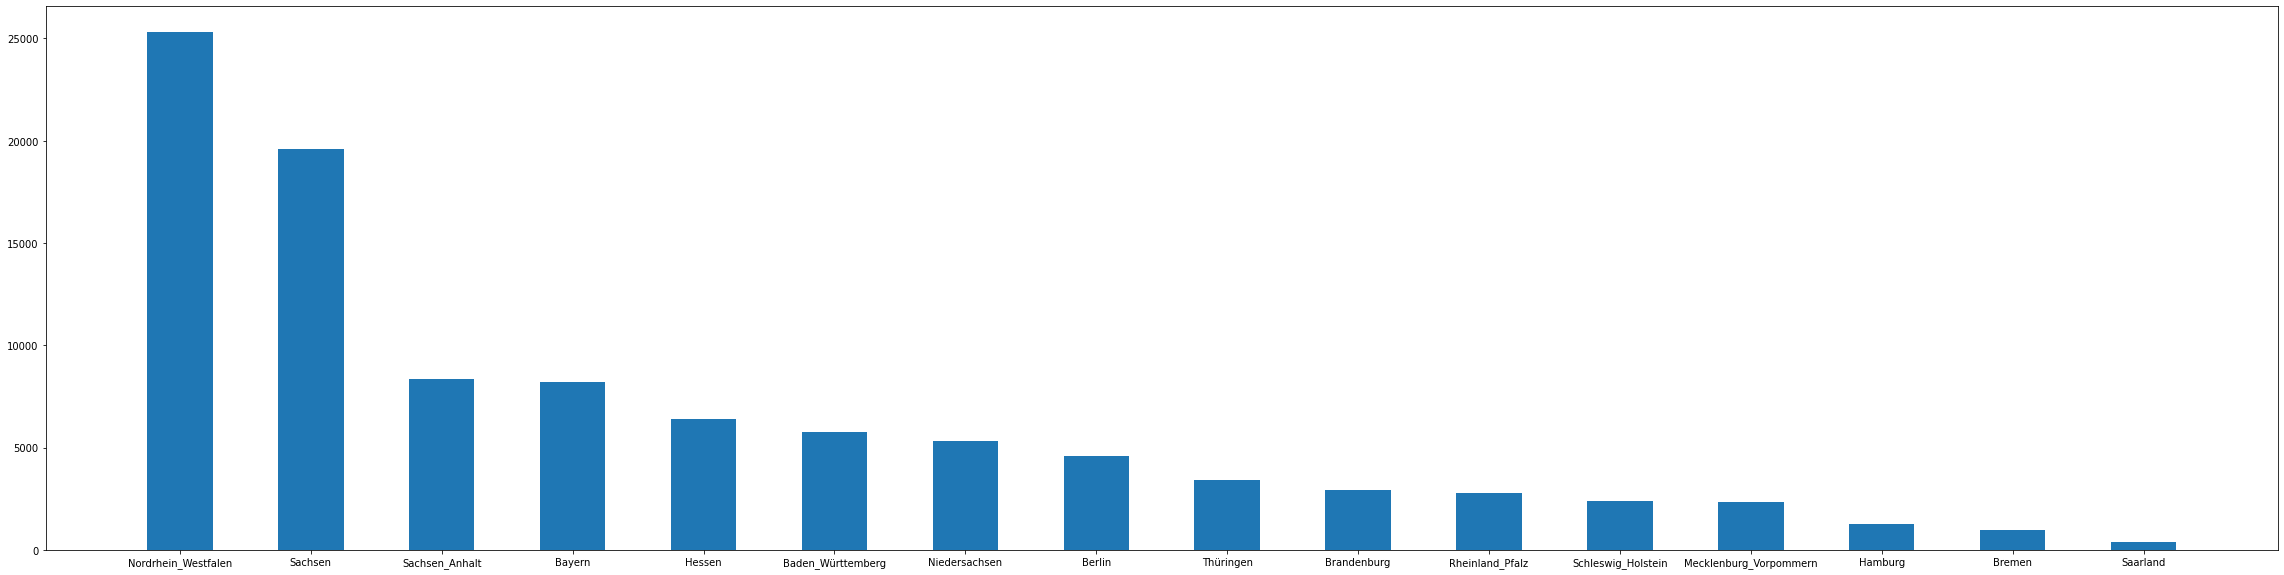

In [ ]:
categories = data['regio1'].value_counts().index
counts = data['regio1'].value_counts().values
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(categories, counts, width=0.5)

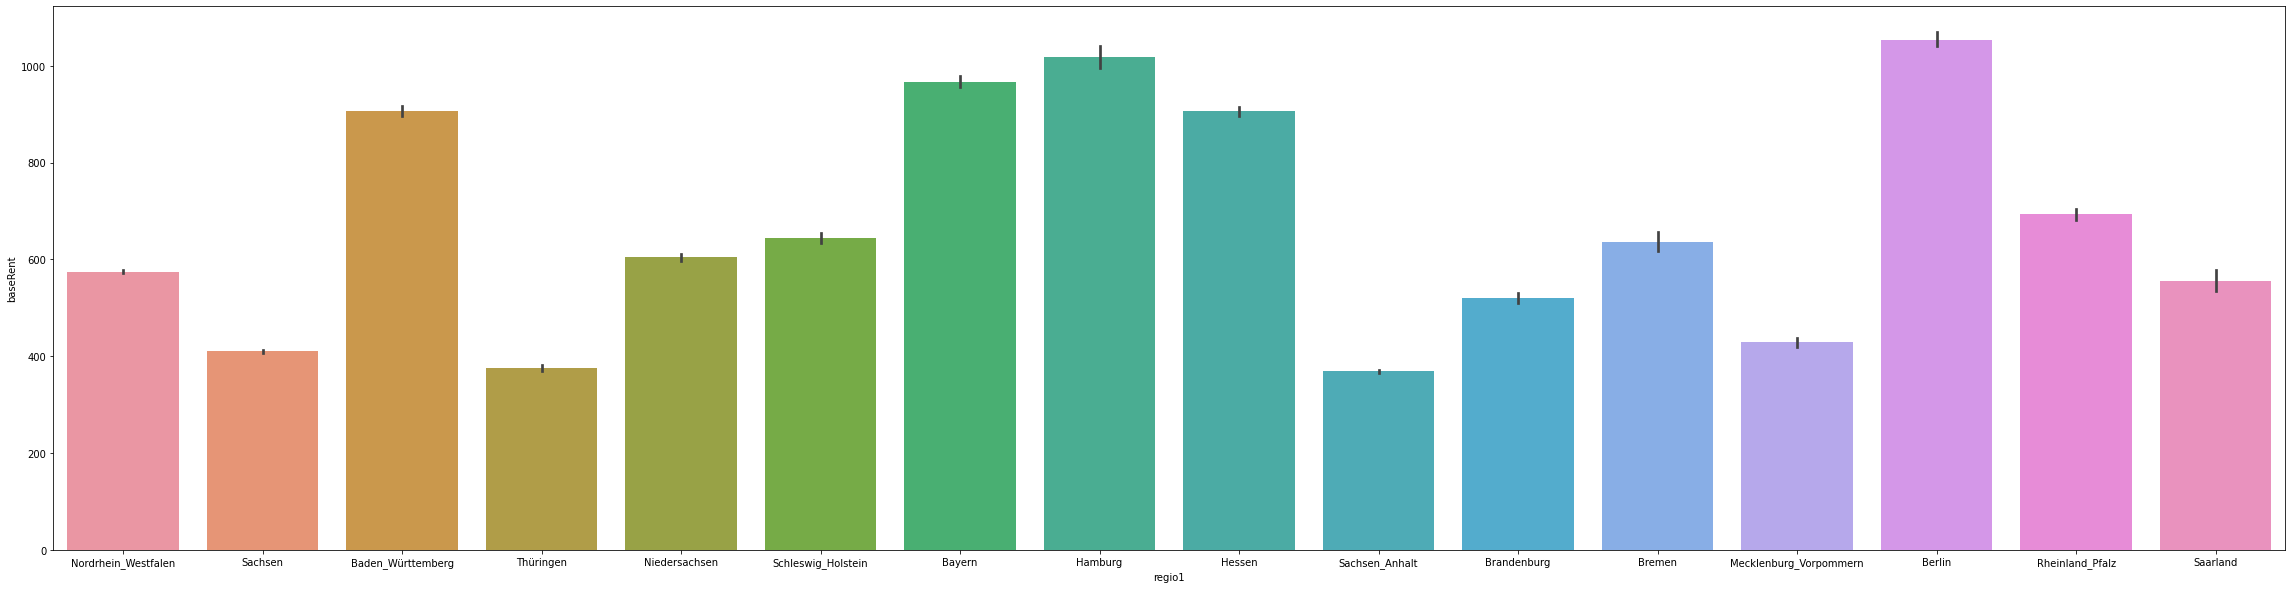

In [ ]:
plt.figure(figsize=(40,10))

sns.barplot(x=data['regio1'], y=data['baseRent'])
plt.show()

In [ ]:
#As in previous step, we will indicate dependences in prices by boolen atributes
data['Boost_TypeOfFlat'] = (data['typeOfFlat'] == 'maisonette') | (data['typeOfFlat'] == 'penthouse') | \
(data['typeOfFlat'] == 'loft') 

data['Exp_area'] = (data['regio1'] == 'Baden_Württemberg') | (data['regio1'] == 'Bayern') | (data['regio1'] == 'Hamburg') | \
(data['regio1'] == 'Hessen') | (data['regio1'] == 'Berlin') 

data['Cheap_area'] = (data['regio1'] == 'Sachsen_Anhalt') | (data['regio1'] == 'Thüringen') | (data['regio1'] == 'Sachsen') | \
(data['regio1'] == 'Mecklenburg_Vorpommern') 

data['Boost_condition'] = (data['condition'] == 'mint_condition') | (data['condition'] == 'first_time_use') | (data['condition'] == 'fully_renovated') | \
(data['condition'] == 'first_time_use_after_refurbishment') 

In [ ]:
data.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,BoostHeating,Boost_TypeOfFlat,Exp_area,Cheap_area,Boost_condition
0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.00,1965.0,False,True,595.0,86.00,well_kept,normal,False,ground_floor,44269,4.0,1.0,3.0,True,True,False,False,False,False
2,Sachsen,255.0,floor_heating,True,True,1300.00,2019.0,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,1097,3.0,3.0,4.0,False,True,False,False,True,True
8,Baden_Württemberg,110.0,oil_heating,False,False,690.00,1970.0,True,True,580.0,53.00,well_kept,sophisticated,False,roof_storey,79211,2.0,2.0,2.0,False,False,False,True,False,False
13,Nordrhein_Westfalen,200.0,central_heating,False,False,1150.00,1951.0,False,False,950.0,123.44,first_time_use_after_refurbishment,sophisticated,False,apartment,59065,4.0,4.0,4.0,False,True,False,False,False,True
14,Nordrhein_Westfalen,215.0,gas_heating,True,True,1320.65,2018.0,False,True,972.6,87.00,first_time_use,sophisticated,True,ground_floor,44229,3.0,0.0,4.0,False,False,False,False,False,True


In [ ]:
import numpy as np
#for better scoring we will youse logarited totalRent
data['logRent'] = np.log(data['totalRent'])

y_var = ['logRent']
X_var = ['newlyConst', 'balcony', 'hasKitchen', 'lift', 'garden', 
        'livingSpace', 'noRooms', 'numberOfFloors',
        'BoostHeating', 'Boost_TypeOfFlat', 'Exp_area', 'Cheap_area', 'Boost_condition'] #'floor'
y = data[y_var].values
X = data[X_var].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RSS:', metrics.mean_squared_error(y_test, y_pred))

X2 = sm.add_constant(y_pred)
est = sm.OLS(y_test, X2)
est2 = est.fit()
print(est2.summary())

MAE: 0.17279025551759594
MSE: 0.05141557120127396
R^2: 0.7847205272286768
RSS: 0.05141557120127396
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 9.122e+04
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:39:35   Log-Likelihood:                 1629.6
No. Observations:               25015   AIC:                            -3255.
Df Residuals:                   25013   BIC:                            -3239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

<Figure size 2880x720 with 0 Axes>

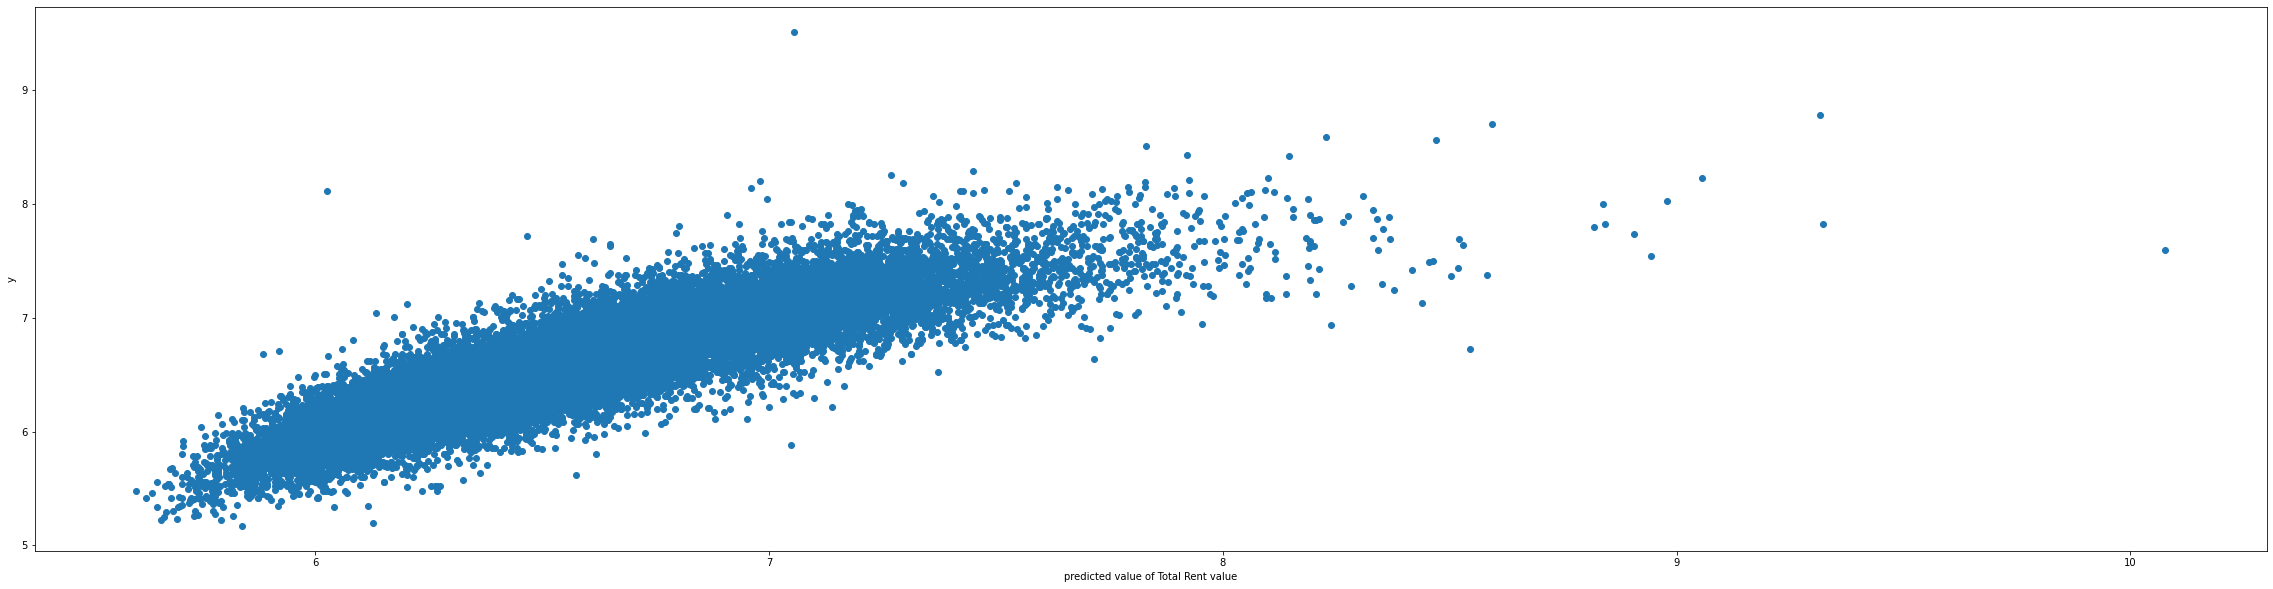

<Figure size 2880x720 with 0 Axes>

In [ ]:
plt.scatter(y_pred,y_test)
plt.xlabel('predicted value of Total Rent value')
plt.ylabel('y')
plt.figure()